In [49]:
# importing the libraries
import numpy as np
import pandas as pd



In [52]:
# opening the data
#everything is ASCII except for that single 0x92 byte
# decode that  in a encoding='cp1252'

df=pd.read_csv('GSAF5.csv', encoding='cp1252')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [53]:
### General insights
df.shape

# check the shape of our dataframe - 5992 rows by 24 columns

(5992, 24)

In [54]:
df.dtypes

# check the columns

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [55]:
#check the on many unique values per column
# original order as the most unique values could be used as and index or pivot column

unique_list=[(i, df[i].nunique()) for i in df.columns]
unique_list

[('Case Number', 5976),
 ('Date', 5128),
 ('Year', 232),
 ('Type', 6),
 ('Country', 203),
 ('Area', 785),
 ('Location', 3929),
 ('Activity', 1492),
 ('Name', 5009),
 ('Sex ', 6),
 ('Age', 151),
 ('Injury', 3595),
 ('Fatal (Y/N)', 8),
 ('Time', 357),
 ('Species ', 1538),
 ('Investigator or Source', 4752),
 ('pdf', 5981),
 ('href formula', 5980),
 ('href', 5972),
 ('Case Number.1', 5975),
 ('Case Number.2', 5976),
 ('original order', 5988),
 ('Unnamed: 22', 1),
 ('Unnamed: 23', 2)]

In [56]:
# for general overview of the data a retrieve some random samples

df.sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1067,2008.02.07,07-Feb-08,2008,Unprovoked,AUSTRALIA,New South Wales,Horseshoe Bay,Surfing,Fiona Casey,F,...,1 m shark,"T. Peake, GSAF",2008.02.07-Casey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.02.07,2008.02.07,4926,NaN,NaN
3488,1964.01.00,Jan-64,1964,Invalid,NEW ZEALAND,North Island,White Island,Snorkeling,J.H. Seddon,M,...,White shark,"H.D.Baldridge (1994) SAF Case #1484, Note: Una...",1964.01.00-NV-Sneddon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1964.01.00,1964.01.00,2505,NaN,NaN
4298,1949.00.00.d,1949,1949,Unprovoked,PAPUA NEW GUINEA,New Ireland Province,"Enang , Kavieng",NaN,Olai,M,...,NaN,"J. McLachlan, Medical Officer, Kavieng; A.M. R...",1949.00.00.d-Olai.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1949.00.00.d,1949.00.00.d,1695,NaN,NaN
514,2012.09.24,24-Sep-12,2012,Unprovoked,USA,Florida,"Spanish House Beach, Brevard County",Surfing,Brandon Murray,M,...,4' shark,"TC Palm, 9/26/2012",2012.09.24-Murray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.09.24,2012.09.24,5479,NaN,NaN
5633,1874.04.20.R,Reported 20-Apr-1874,1874,Boating,CANADA,Newfoundland,St. Pierre Bank,Fishing,A dory: occupants : 2 men,M,...,White shark,Jones (1879); Piers (1933),1874.04.20.R-Dory.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1874.04.20.R,1874.04.20.R,360,NaN,NaN
2734,1982.11.00,Nov-82,1982,Unprovoked,USA,South Carolina,"Isle of Palms, Charleston County",In waist-deep water,male,M,...,NaN,F. Schwartz,1982.11.00-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1982.11.00,1982.11.00,3259,NaN,NaN
4726,1933.08.28.b,28-Aug-33,1933,Provoked,USA,California,"Hermosa Beach, Los Angeles County","Fishing, caught a 15' shark & took it onboard",Nathaniel Myrick,M,...,"Blue shark, 4.5 m [14'9""]","D. Baldridge, p.90",1933.08.28.b-Myrick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1933.08.28.b,1933.08.28.b,1267,NaN,NaN
3266,1967.12.30,30-Dec-67,1967,Unprovoked,SOUTH AFRICA,Western Cape Province,Mossel Bay,Surfing,Brian Pearson,M,...,1.5 m to 1.8 m [5' to 6'] shark,"B. Pearson, M. Levine, GSAF",1967.12.30-Pearson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967.12.30,1967.12.30,2727,NaN,NaN
5479,1888.12.00,Dec-1888,1888,Unprovoked,AUSTRALIA,New South Wales,"Hawkesbury Bridge, Sydney",Working on the bridge when he fell into the river,Mr. Ryland,M,...,NaN,"G.P. Whitley (1951), p.192, citing Sydney Morn...",1888.12.00-Ryland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1888.12.00,1888.12.00,514,NaN,NaN
250,2014.11.29,29-Nov-14,2014,Unprovoked,AUSTRALIA,Western Australia,"Pyramids Beach, Port Bouvard",Surfing,Cameron Pearman,M,...,NaN,"The Sydney Morning Herald, 11/29/2014",2014.11.29-Pearman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.11.29,2014.11.29,5742,NaN,NaN


In [57]:
df['Sex '].value_counts()


M      4835
F       585
M         2
N         1
.         1
lli       1
Name: Sex , dtype: int64

In [58]:
#the column names also need cleaning
#treating the columns index for more readable and manipulating
df.columns=[x.strip().replace(' ','_') for x in df.columns]
x=[print(i) for i in df.columns]

Case_Number
Date
Year
Type
Country
Area
Location
Activity
Name
Sex
Age
Injury
Fatal_(Y/N)
Time
Species
Investigator_or_Source
pdf
href_formula
href
Case_Number.1
Case_Number.2
original_order
Unnamed:_22
Unnamed:_23


In [59]:
#Checking 

In [60]:
df.isna().sum()
# check for non value

Case_Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal_(Y/N)                 19
Time                      3213
Species                   2934
Investigator_or_Source      15
pdf                          0
href_formula                 1
href                         3
Case_Number.1                0
Case_Number.2                0
original_order               0
Unnamed:_22               5991
Unnamed:_23               5990
dtype: int64

In [61]:
df.isna().sum()/len(df)
#percentage of non values

Case_Number               0.000000
Date                      0.000000
Year                      0.000000
Type                      0.000000
Country                   0.007176
Area                      0.067089
Location                  0.082777
Activity                  0.087951
Name                      0.033378
Sex                       0.094626
Age                       0.447430
Injury                    0.004506
Fatal_(Y/N)               0.003171
Time                      0.536215
Species                   0.489653
Investigator_or_Source    0.002503
pdf                       0.000000
href_formula              0.000167
href                      0.000501
Case_Number.1             0.000000
Case_Number.2             0.000000
original_order            0.000000
Unnamed:_22               0.999833
Unnamed:_23               0.999666
dtype: float64

In [62]:
(df['Unnamed:_22'].value_counts() ,
  df['Unnamed:_23'].value_counts())
# this columns have more than 90% non value , they dont matter

(stopped here    1
 Name: Unnamed:_22, dtype: int64,
 Teramo             1
 change filename    1
 Name: Unnamed:_23, dtype: int64)

In [63]:
#find the not non value rows in 'Unnamed:_22' and 'Unnamed:_23'
# simple concat to see everything

pd.concat([
           df.loc[pd.notnull(df["Unnamed:_22"])] ,
            df.loc[pd.notnull(df["Unnamed:_23"])] 
                ])

# it seems it is some comments of records change
# irrelevant for our cleaning

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,Unnamed:_22,Unnamed:_23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN
4182,1952.07.13,13-Jul-52,1952,Provoked,USA,California,"San Diego, San Diego County",Fishing,"Gerald Howard, on board sportsfishing boat Ter...",M,...,NaN,"L.A. Times, 7/14/1952",1952.07.13-Howard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.07.13,1952.07.13,1811,NaN,Teramo
5585,1879.03.10,10-Mar-1879,1879,Invalid,AUSTRALIA,New South Wales,Near Sydney,The steamship Bonnie Dundee lost in collision,Cabin boy of the Bonnie Dundee,M,...,NaN,"Star, 3/22/1879",1879.03.10-Bonnie-Dundee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1879.03.10,1879.03.10,408,NaN,change filename


In [64]:
#removing the two last columns
df_copy=df.drop(columns=['Unnamed:_23','Unnamed:_22']).copy()

In [65]:
# select a random of rows to see the types of values and how to aproach the cleaning

df_copy.sample(n=10)

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
4328,1948.00.00.d,Summer 1948,1948,Provoked,USA,Florida,Biscayne Bay,Underwater photography,Charles L. Morgan,M,...,N,Afternoon,Nurse shark,C.L. Morgan,1948.00.00.d-Morgan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1948.00.00.d,1948.00.00.d,1665
2490,1988.09.13.b,13-Sep-88,1988,Unprovoked,USA,Florida,"Shell Island Panama City Beach, Bay County",Walking,Dennis & Ann Hadden,F,...,N,15h45,1.8 m [6'] shark,"M. Womack, News Herald; Orlando Sentinel, 9/18...",1988.09.13.b-Hadden.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.09.13.b,1988.09.13.b,3504
4675,1935.06.05.R,Reported 05-Jun-1935,1935,Unprovoked,SOLOMON ISLANDS,Makira-Uluwa Province,Makira Island,Fishing,a native,M,...,Y,NaN,NaN,"Sydney Mail, 6/5/1935",1935.06.05.R-SolomonIslands.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1935.06.05.R,1935.06.05.R,1318
649,2011.09.02,02-Sep-11,2011,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Daniel True,M,...,N,11h00,"6' shark, possibly a blactip or spinner shark","WESH.com, 9/2/2011",2011.09.02-True.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.09.02,2011.09.02,5344
3013,1975.02.23,23-Feb-75,1975,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Inyoni Rocks, Amanzimtoti",Surfing,Bretton Russell Jones,M,...,N,10h55,1.5 m [5'] shark,"S. Jooste; B.R. Jones, M. Levine, GSAF; T. Wal...",1975.02.23-Jones.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1975.02.23,1975.02.23,2980
4877,1928.04.06,06-Apr-28,1928,Unprovoked,AUSTRALIA,Queensland,Graceville,Bathing,Noel Arthy,M,...,N,Morning,4' shark,"Brisbane Courier, 5/8/1928",1928.04.06-Arthy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1928.04.06,1928.04.06,1116
5652,1871.00.00.c,1871,1871,Unprovoked,AUSTRALIA,New South Wales,Manning River,NaN,male,M,...,Y,NaN,NaN,"G.P. Whitley, ref E.S. Hill, Sydney Mail, 5/6/...",1871.00.00.c-ManningRiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1871.00.00.c,1871.00.00.c,341
686,2011.06.19.a,19-Jun-11,2011,Unprovoked,COSTA RICA,Guanacaste,Playa Grande,Surfing,Kevin Moraga,M,...,Y,12h15,NaN,"D. Martinez, Tico Times, 6/21/2011",2011.06.19.a-Moraga.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.06.19.a,2011.06.19.a,5307
5848,1738.04.06.R,Reported 06-Apr-1738,1738,Unprovoked,ITALY,Sicily,Strait of Messina,Swimming,male,M,...,Y,NaN,NaN,"C. Moore, GSAF",1738.04.06.R-Messina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1738.04.06.R,1738.04.06.R,145
3649,1961.09.26,26-Sep-61,1961,Provoked,USA,Florida,"Florida Keys, Monroe County",NaN,Paul Walter,M,...,N,16h30,NaN,H.D.Baldridge (1994) SAF Case #923,1961.09.26-NV-PaulWalter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.09.26,1961.09.26,2344


In [66]:
#checking for differente values from 3 collums

pd.Series((df_copy['Case_Number.1']==df_copy['Case_Number.2'])
          & (df_copy['Case_Number.2']==df_copy['Case_Number'])).value_counts()

True     5979
False      13
dtype: int64

In [67]:
df_copy[(pd.Series((df_copy['Case_Number.1']==df_copy['Case_Number.2'])
          & (df_copy['Case_Number.2']==df_copy['Case_Number'])) )== False]

# with this function i could see all of the rows where the 3 differente case numbers are diferent
# OUTPUT of a total 13 rows!

#all of the other rows are equal and the different are just minor diferences
# i also notice that i could extract a more "clean date from the records"

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
33,2016.07.14.4,Reported 14-Jul-2016,2016,Unprovoked,BAHAMAS,NaN,Tiger Beach,Scuba Diving,Michael Dornellas,M,...,N,NaN,"Lemon shark, 9'","GrindTV, 7/14/2016",2016.07.14.R-TigerBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.14.R,2016.07.14.4,5960
97,2016.01.24.b,24-Jan-16,2016,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,...,N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5896
116,2015.12.23,07-Nov-15,2015,Invalid,USA,Florida,"Paradise Beach, Melbourne, Brevard County",Surfing,Ryla Underwood,F,...,N,11h00,Shark involvement not confirmed,"Fox25Orlando, 11/7/2015",2015.11.07-Underwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.11.07,2015.12.23,5876
121,2015.10.28.a,28-Oct-15,2015,Unprovoked,USA,Hawaii,"Malaka, Oahu",Body boarding,Raymond Senensi,M,...,N,14h50,NaN,"Star Advertiser, 10/28/2015",2015.10.28-Senensi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.28,2015.10.28.a,5871
169,2015.07-10,10-Jul-15,2015,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,...,N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5823
3296,1967.07.05,05-Jul-67,1967,Unprovoked,TURKEY,Mugla Province,Kucukada Island,Spearfishing,Gungor Guven,M,...,Y,13h40,NaN,"C. Moore, GSAF",1967.07.05-Guven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967/07.05,1967.07.05,2697
3569,"1962,08.30.b",30-Aug-62,1962,Boat,TURKEY,Antalya Province,Ucagiz,NaN,Occupant: Hasan Olta,M,...,N,NaN,NaN,"C.Moore, GSAF",1962.08.30.b-pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.08.30.b,"1962,08.30.b",2424
3654,1961.09.02.R,Reported 06-Sep-1961,1961,Provoked,ITALY,Venice Province,Chioggia,Fishing,Pollione Perrini & Fioravante Perini,M,...,N,NaN,1 m shark,"C. Moore, GSAF",1961.09.06.R-Chioggia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"1961.09,06.R",1961.09.02.R,2339
4177,1952.08.05,05-Aug-52,1952,Provoked,ITALY,Teramo,Giulianova,Fishing,Vittorio Speca,NaN,...,Y,02h00,2m shark,"C. Moore, GSAF",1952.08.05-Speca.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.08.04,1952.08.05,1816


In [68]:
# I will group for year and count the number of shark attacks for our first question


records_year=df.groupby(by="Year").size().copy()


2.18 µs ± 67.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


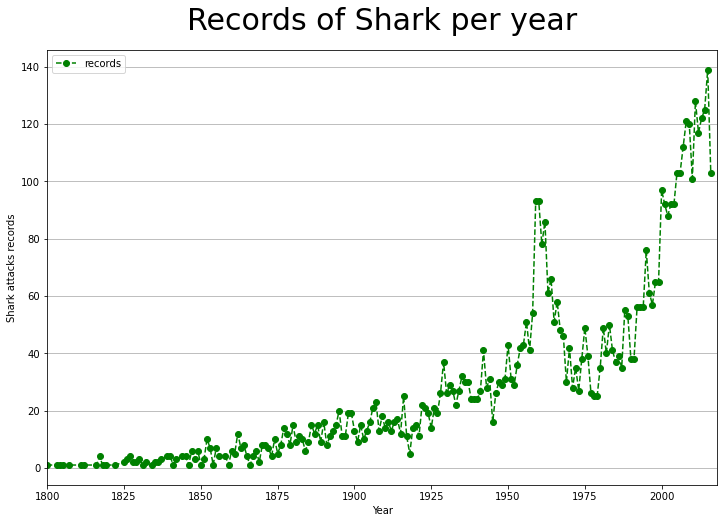

In [69]:
# for plotting
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%timeit [x**2 for x in range(10)]
%magic

# How to initialize the two essential objects for plotting:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(records_year,
       color='green',
       marker='o',
       linestyle='dashed',
       label='records',
       )
ax.set_xlim([1800,2018])
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Shark attacks records', fontsize=10);
ax.set_title('Records of Shark per year', fontsize=30, pad=20);
ax.grid(axis='y')
ax.legend()



In [70]:
##  FALSE insights
# this doenst show us the increase of shark attacks but the number of records are
# you can relate this to the covid infections statisctis because there is more cases doenst mean that the cases are rising but could also mean there are more testing


In [71]:
# extract the date from column 1
# assing a new columm with date from case number
# clean value with regex
# data type 1111011011

df_copy=df_copy.assign(date_cn=df_copy['Case_Number'].astype(str).str[0:10]) # extracts the first 10 char

# with this function a manage reduce NAN from 862 to 525 non values
#good enough to check records per month
df_copy['date_cn']=df_copy['date_cn'].replace({'00$': '01'}, regex=True) 

df_copy['date_cn']=df_copy['date_cn'].replace({'[,-]': '.'}, regex=True) 

# convert the data type to a datetime 
df_copy['date_cn']=pd.to_datetime(df_copy['date_cn'],format='%Y.%m.%d',errors='coerce')



df_copy.dtypes



Case_Number                       object
Date                              object
Year                               int64
Type                              object
Country                           object
Area                              object
Location                          object
Activity                          object
Name                              object
Sex                               object
Age                               object
Injury                            object
Fatal_(Y/N)                       object
Time                              object
Species                           object
Investigator_or_Source            object
pdf                               object
href_formula                      object
href                              object
Case_Number.1                     object
Case_Number.2                     object
original_order                     int64
date_cn                   datetime64[ns]
dtype: object

In [72]:
df_copy.isna().sum()
#df_copy.dtypes


Case_Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal_(Y/N)                 19
Time                      3213
Species                   2934
Investigator_or_Source      15
pdf                          0
href_formula                 1
href                         3
Case_Number.1                0
Case_Number.2                0
original_order               0
date_cn                    523
dtype: int64

In [73]:
# extracting the month and count the cases per month

records_month=pd.DatetimeIndex(df_copy['date_cn']).month.value_counts().sort_index()

In [74]:
records_month

1.0     499
2.0     359
3.0     398
4.0     410
5.0     368
6.0     474
7.0     634
8.0     580
9.0     524
10.0    407
11.0    393
12.0    423
Name: date_cn, dtype: int64

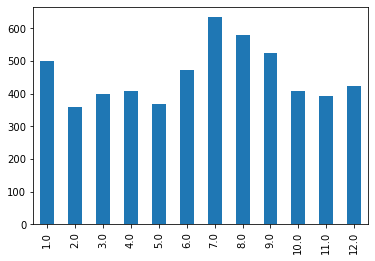

In [75]:
# ploting records of shark attacks per month

records_month.plot(kind='bar')


In [76]:
df_copy.sample(10)

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order,date_cn
1947,1998.08.13,13-Aug-98,1998,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Body-boarding,Robert Parcus,M,...,NaN,4.5' to 5' shark,"A. Buttigieg, GSAF",1998.08.13-Parcus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1998.08.13,1998.08.13,4046,1998-08-13
3098,1972.10.10.R,Reported 10-Oct-1972,1972,Unprovoked,NEW ZEALAND,North Island,Wanganui,Swimming,Barry Kumara,M,...,NaN,NaN,"European Stars and Stripes, 10/10/1973",1972.10.10.R-Kumara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1972.10.10.R,1972.10.10.R,2895,1972-10-10
2688,1983.12.21,21-Dec-83,1983,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Nahoon,Swimming,Jack Heydenrych,M,...,08h15,"Raggedtooth shark, >1 m","R. Horn, East London Aquarium; J. Heydenrych,...",1983.12.21-Heydenrych.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.12.21,1983.12.21,3305,1983-12-21
1249,2006.06.15,15-Jun-06,2006,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Mike Milea,M,...,15h30,2' to 3' shark,"S. Petersohn, GSAF",2006.06.15-Milea.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.15,2006.06.15,4744,2006-06-15
1787,2000.09.11,11-Sep-00,2000,Unprovoked,USA,Florida,"Daytona Beach Shores, Volusia County",Swimming / Body surfing,Jason Armstrong,M,...,13h20,60 cm to 90 cm [2' to 3'] shark,"S. Petersohn, GSAF; Daytona Beach News Journa...",2000.09.11-Armstrong.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.09.11,2000.09.11,4206,2000-09-11
1501,2003.10.31.c,31-Oct-03,2003,Unprovoked,USA,Florida,"Ponte Vedra Beach, St. Johns County",Surfing,Adam Gray,M,...,15h00,1.2 m to 1.5 m [4' to 5'] shark,"D. Dixon, Florida Times-Union, 11/8/2003",2003.10.31.c-Gray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2003.10.31.c,2003.10.31.c,4492,2003-10-31
1999,1997.09.09,09-Sep-97,1997,Unprovoked,USA,Florida,Volusia County,Surfing,G.D.,M,...,17h15,NaN,"S. Petersohn, GSAF",1997.09.09-Dietlin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.09.09,1997.09.09,3994,1997-09-09
5574,1880.01.03,03-Jan-1880,1880,Unprovoked,AUSTRALIA,New South Wales,Cooranbong,Bathing,Teresa Bonnell,F,...,NaN,NaN,"Morning Bulletin, 1/28/1880",1880.01.03-Bonnell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1880.01.03,1880.01.03,419,1880-01-03
551,2012.06.26.a,26-Jun-12,2012,Unprovoked,USA,Hawaii,"Kahana Beach, Maui",Sitting in the water,Sage St. Clair,F,...,09h45,a small reef shark,"Hawaii News Now, 6/26/2012",2012.06.26.a-StClair.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.26.a,2012.06.26.a,5442,2012-06-26
5244,1906.04.10.R.a & b,Reported 10-April 1906,1906,Sea Disaster,INDONESIA,NaN,40 miles from Tahane Island,The schooner Tahitienne foundered in a hurricane,Captain Baxter & Dick Chares,M,...,NaN,NaN,"Atlanta Constitution, 5/13/1906, et al.",1906.04.10.R.a-b-Baxter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1906.04.10.R.a & b,1906.04.10.R.a & b,749,1906-04-10


In [77]:
#checking for differente values from href_formula and href

pd.Series((df_copy['href_formula']==df_copy['href'])).value_counts()

# checking the different values between those two columns
#  df_copy[(pd.Series((df_copy['href_formula']==df_copy['href']))) == False][['href_formula', 'href']] 


True     5938
False      54
dtype: int64

In [78]:
df_copy["Country"].value_counts()

USA                       2116
AUSTRALIA                 1279
SOUTH AFRICA               565
PAPUA NEW GUINEA           133
NEW ZEALAND                125
                          ... 
St Helena                    1
RED SEA / INDIAN OCEAN       1
ST. MAARTIN                  1
RED SEA                      1
UNITED ARAB EMIRATES         1
Name: Country, Length: 203, dtype: int64

In [92]:
# for a better view of the data I remove the columns that had text , repetitive information, colum with names.
# basicaly i made a new list with information i can gather into groups and left two columns with unique  values
# (case_number and original_order) in case i need to merge with some aditional data

df_essencial=df_copy[['Case_Number', 'date_cn', 'Type','Activity', 'Country', 'Area','Location',
                     'Sex', 'Age', 'Injury', 'Fatal_(Y/N)', 'Time','Species', 'original_order']].copy()

In [93]:
df_essencial

,Case_Number,date_cn,Type,Activity,Country,Area,Location,Sex,Age,Injury,Fatal_(Y/N),Time,Species,original_order
0,2016.09.18.c,2016-09-18,Unprovoked,Surfing,USA,Florida,"New Smyrna Beach, Volusia County",M,16,Minor injury to thigh,N,13h00,NaN,5993
1,2016.09.18.b,2016-09-18,Unprovoked,Surfing,USA,Florida,"New Smyrna Beach, Volusia County",M,36,Lacerations to hands,N,11h00,NaN,5992
2,2016.09.18.a,2016-09-18,Unprovoked,Surfing,USA,Florida,"New Smyrna Beach, Volusia County",M,43,Lacerations to lower leg,N,10h43,NaN,5991
3,2016.09.17,2016-09-17,Unprovoked,Surfing,AUSTRALIA,Victoria,Thirteenth Beach,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,5990
4,2016.09.15,2016-09-15,Unprovoked,Surfing,AUSTRALIA,Victoria,Bells Beach,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,NaT,Unprovoked,Diving,AUSTRALIA,Western Australia,Roebuck Bay,M,NaN,FATAL,Y,NaN,NaN,6
5988,ND.0004,NaT,Unprovoked,Pearl diving,AUSTRALIA,Western Australia,NaN,M,NaN,FATAL,Y,NaN,NaN,5
5989,ND.0003,NaT,Unprovoked,Swimming,USA,North Carolina,Ocracoke Inlet,M,NaN,FATAL,Y,NaN,NaN,4
5990,ND.0002,NaT,Unprovoked,NaN,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",M,NaN,FATAL,Y,NaN,NaN,3


In [94]:
# the next data cleaning ill do is
# capitalize and strip all strings from relanvant columns so there ll be less types of entries on the following collumns:
# type , country,Sex, Fatal_(Y/N), species



clist=['Type' ,'Activity', 'Country','Sex', 'Fatal_(Y/N)', 'Species']

for i in clist:
    df_essencial[i]=df_essencial[i].str.upper().str.strip()
    
df_essencial

,Case_Number,date_cn,Type,Activity,Country,Area,Location,Sex,Age,Injury,Fatal_(Y/N),Time,Species,original_order
0,2016.09.18.c,2016-09-18,UNPROVOKED,SURFING,USA,Florida,"New Smyrna Beach, Volusia County",M,16,Minor injury to thigh,N,13h00,NaN,5993
1,2016.09.18.b,2016-09-18,UNPROVOKED,SURFING,USA,Florida,"New Smyrna Beach, Volusia County",M,36,Lacerations to hands,N,11h00,NaN,5992
2,2016.09.18.a,2016-09-18,UNPROVOKED,SURFING,USA,Florida,"New Smyrna Beach, Volusia County",M,43,Lacerations to lower leg,N,10h43,NaN,5991
3,2016.09.17,2016-09-17,UNPROVOKED,SURFING,AUSTRALIA,Victoria,Thirteenth Beach,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,5990
4,2016.09.15,2016-09-15,UNPROVOKED,SURFING,AUSTRALIA,Victoria,Bells Beach,M,NaN,No injury: Knocked off board by shark,N,NaN,2 M SHARK,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,NaT,UNPROVOKED,DIVING,AUSTRALIA,Western Australia,Roebuck Bay,M,NaN,FATAL,Y,NaN,NaN,6
5988,ND.0004,NaT,UNPROVOKED,PEARL DIVING,AUSTRALIA,Western Australia,NaN,M,NaN,FATAL,Y,NaN,NaN,5
5989,ND.0003,NaT,UNPROVOKED,SWIMMING,USA,North Carolina,Ocracoke Inlet,M,NaN,FATAL,Y,NaN,NaN,4
5990,ND.0002,NaT,UNPROVOKED,NaN,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",M,NaN,FATAL,Y,NaN,NaN,3


In [95]:
# Boat and Boating is for me the same activity

df_essencial['Type'].replace("BOAT", "BOATING", inplace=True)
df_essencial['Type'].value_counts()

UNPROVOKED      4386
PROVOKED         557
INVALID          519
BOATING          310
SEA DISASTER     220
Name: Type, dtype: int64

In [96]:
# here we can see the ten top Countrys of records
(df_essencial["Country"].value_counts().iloc[0:10], 
 
print("the top 10 countries with the most shark attacks records represent", 
      round(df_essencial["Country"].value_counts().iloc[0:10].sum()/5992*100,2), "% of the raw data")
                                                                                                        )

the top 10 countries with the most shark attacks records represent 77.37 % of the raw data


(USA                 2116
 AUSTRALIA           1279
 SOUTH AFRICA         565
 PAPUA NEW GUINEA     133
 NEW ZEALAND          125
 BRAZIL               102
 BAHAMAS               98
 MEXICO                82
 ITALY                 71
 FIJI                  65
 Name: Country, dtype: int64,
 None)

In [97]:
#df_essencial["Age"].value_counts().tail(50)
df_essencial["Age"]=df_essencial["Age"].str.strip()
df_essencial["Age"]=pd.to_numeric(df_essencial["Age"],errors='coerce')
df_essencial["Age"].value_counts()


17.0    148
18.0    145
19.0    138
20.0    136
15.0    135
       ... 
84.0      1
87.0      1
67.0      1
86.0      1
81.0      1
Name: Age, Length: 79, dtype: int64

In [98]:
df_essencial.dtypes

Case_Number               object
date_cn           datetime64[ns]
Type                      object
Activity                  object
Country                   object
Area                      object
Location                  object
Sex                       object
Age                      float64
Injury                    object
Fatal_(Y/N)               object
Time                      object
Species                   object
original_order             int64
dtype: object

In [99]:
# comparing to my inicial Dataframe
# i opt to not take any rows because they could be further manipulate depending of the anylisis of what 
unique_essencial=[(i, df_essencial[i].nunique()) for i in df_essencial.columns]
unique_essencial

[('Case_Number', 5976),
 ('date_cn', 4762),
 ('Type', 5),
 ('Activity', 1435),
 ('Country', 192),
 ('Area', 785),
 ('Location', 3929),
 ('Sex', 5),
 ('Age', 79),
 ('Injury', 3595),
 ('Fatal_(Y/N)', 5),
 ('Time', 357),
 ('Species', 1441),
 ('original_order', 5988)]

In [87]:
# write to a .csv file

df_essencial.to_csv('Mydatacleaning.csv')

#shape of the data
df_essencial.shape

(5992, 14)